In [1]:
from torch.distributions.beta import Beta
from mutect3 import tensors, train, networks
from mutect3 import normal_artifact as na
import torch.utils.data

%matplotlib inline

In [2]:
# load table files produced by GATK, parse and generate data, and pickle data
PICKLE_DIR = '/Users/davidben/broad/mutect3/pickles/'
NORMAL_ARTIFACT_DIR = '/Users/davidben/broad/mutect3/normal_artifact/'


DREAMS = ['dream1', 'dream2' , 'dream3', 'dream4']
tumor_samples = ['synthetic.challenge.set1.tumor','background.synth.challenge2.snvs.svs.tumorbackground','IS3.snv.indel.sv','synthetic.challenge.set4.tumour']
normal_samples = ['synthetic.challenge.set1.normal','synthetic.challenge.set2.normal','G15512.prenormal.sorted','synthetic.challenge.set4.normal']

DREAM_1_PAIR, DREAM_2_PAIR, DREAM_3_PAIR, DREAM_4_PAIR = (PICKLE_DIR + dream + '-pair-train.pickle' for dream in DREAMS)
DREAM_1_TEST, DREAM_2_TEST, DREAM_3_TEST, DREAM_4_TEST = (PICKLE_DIR + dream + '-test.pickle' for dream in DREAMS)


# just dream 1 for speed
#DREAMS = ['dream1']
#tumor_samples = ['synthetic.challenge.set1.tumor']
#normal_samples = ['synthetic.challenge.set1.normal']

DREAM_1_SMALL_PAIR = PICKLE_DIR + 'dream1-small-pair-train.pickle'
DREAM_1_SMALL_TEST = PICKLE_DIR + 'dream1-small-test.pickle'

NA_PICKLE = NORMAL_ARTIFACT_DIR + 'small-normal-artifact.pickle'

GENERATE_PICKLES = False
if GENERATE_PICKLES:
    table_dir = '/Users/davidben/broad/mutect3/tables/'

    for dream, tumor_sample, normal_sample in zip(DREAMS, tumor_samples, normal_samples):
        print("Generating tensors for " + dream)
        tumor_table, normal_table = (table_dir + dream + suffix for suffix in ('-tumor.table', '-normal.table'))
        tensors.generate_pickles(tumor_table, normal_table, tumor_sample, normal_sample, PICKLE_DIR, dream) 
        
    na_table_file = NORMAL_ARTIFACT_DIR + 'small-normal-artifact.table'
    na.generate_normal_artifact_pickle(na_table_file, NORMAL_ARTIFACT_DIR, 'small')

Loading normal artifact dataset from pickled files
Training normal artifact model



Loading datasets from pickled files
Unlabeled data: 4423, labeled data: 8084
Dataset sizes -- training: 11256, validation: 1251, test: 1764
Training data includes 0 PASS variants labelled as artifacts.



tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
tensor([10.4323, 10.4024,  8.3148,  9.7738, 10.7548, 11.1978, 10.5961, 10.7475,
        10.1067,  7.5436, 11.4243, 10.3525, 10.5538,  9.4262, 10.4886,  8.8986,
        10.6593,  9.3829,  8.6990, 10.8448, 10.9724, 11.2670,  6.1183,  9.7730,
        10.5438, 12.4291,  9.8677, 10.3978,  8.5647, 10.8960,  0.3379, 10.5417,
        10.6372, 11.5338, 10.5771,  6.5448,  9.5795,  9.5036, 10.1401, 10.4530,
        10.7319, 10.0092, 10.4024,  6.2817, 10.7081, 10.8617,  4.5949,  7.7703,
        10.5168,  9.9305,  9.5795, 11.2347, 10.5076,  9.1747, 10.1701, 11.9446,
         9.7585,  8.6534,  9.1865, 10.3933, 10.1929, 10.6499, 10.7492, 10.4101])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
tensor([11.9446, 10.3730, 10.6493,  5.9609, 11.2121,  9.6188, 10.1570, 10.3856,
        10.9018, 10.0740, 10.3730, 10.9878, 10.6493,  9.6791, 12.6403, 10.0088,
         7.5616,  7.3619, 10.5898, 10.7467, 10.0088, 10.7861,  8.3124, 10.8013,
         8.4989, 10.4886, 11.0027, 10.4530, 10.2628, 11.0236, 10.3933, 10.7081,
         8.0240, 10.8533,  8.6990,  7.9341, 11.1191,  7.4335, 11.7763,  6.4973,
        10.8283,  8.8431,  8.3929, 10.8302, 10.9717,  9.0820,  9.5036, 11.0610,
         9.1804,  9.1820, 10.9045,  8.7707,  9.9236, 11.2800,  6.3620, 10.5597,
         9.3199,  9.0576, 10.5397, 10.3149, 10.8281,  8.6177,  8.9398, 10.9040])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Optimal logit threshold: 0.08727942407131195


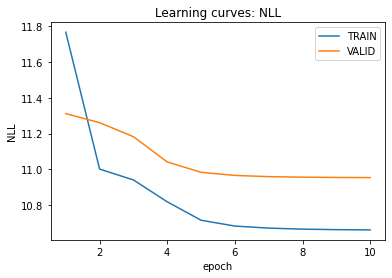

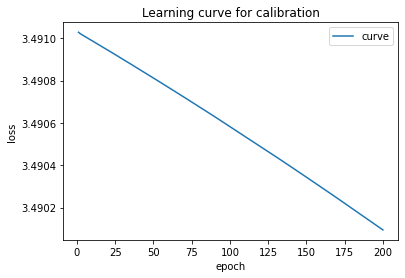

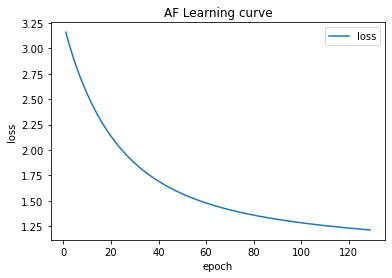

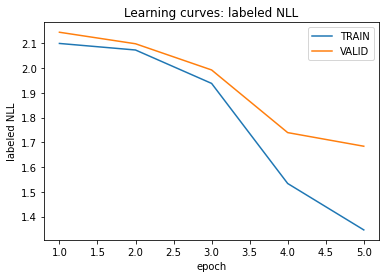

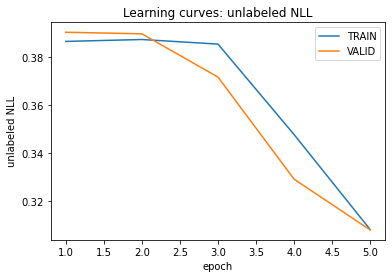

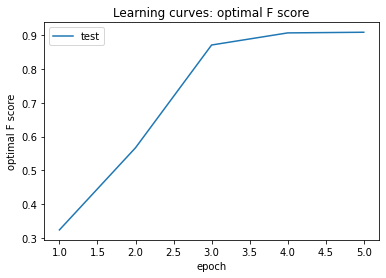

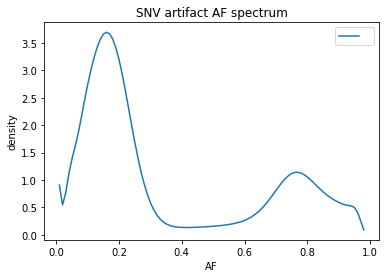

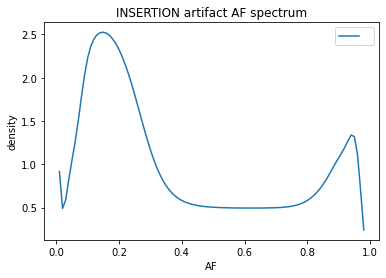

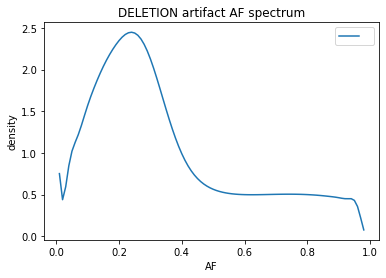

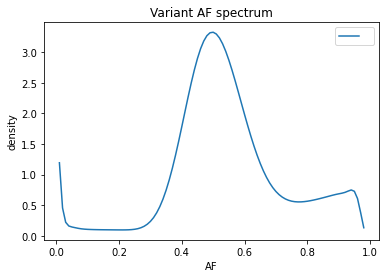

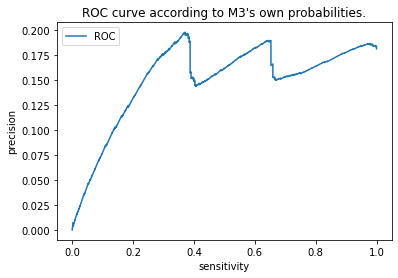

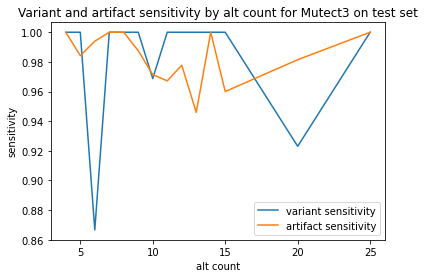

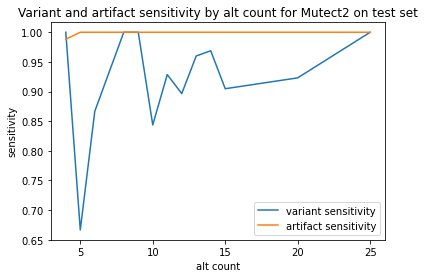

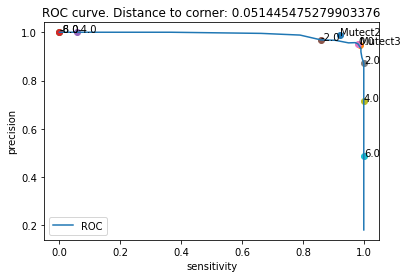

In [4]:
beta1 = Beta(5,1)
beta2 = Beta(5,1)
batch_size = 64
num_epochs = 5
params = train.TrainingParameters(batch_size, num_epochs, beta1, beta2)

hidden_read_layers = [20,20]
hidden_info_layers = [20,20]
aggregation_layers = [20]
output_layers = [10]
dropout_p = 0.2
m3_params = networks.Mutect3Parameters(hidden_read_layers, hidden_info_layers, aggregation_layers, output_layers, dropout_p)

trained_model = train.run_evaluation([DREAM_1_SMALL_PAIR], DREAM_1_SMALL_TEST, NA_PICKLE, params, m3_params)

In [ ]:
beta1 = Beta(5,1)
beta2 = Beta(5,1)
batch_size = 64
num_epochs = 20
params = train.TrainingParameters(batch_size, num_epochs, beta1, beta2)

hidden_read_layers = [30,30,30,30]
hidden_info_layers = [20,20,20]
aggregation_layers = [20,20]
output_layers = [10]
dropout_p = 0.2
m3_params = networks.Mutect3Parameters(hidden_read_layers, hidden_info_layers, aggregation_layers, output_layers, dropout_p)
trained_model = train.run_evaluation([DREAM_1_PAIR], DREAM_1_TEST, NA_PICKLE, params, m3_params)

Loading normal artifact dataset from pickled files
Training normal artifact model



Loading datasets from pickled files
Unlabeled data: 44457, labeled data: 80619
Dataset sizes -- training: 112568, validation: 12508, test: 17649
Training data includes 18 PASS variants labelled as artifacts.


In [16]:
alpha, beta = na_model.get_beta_parameters(batch)
shapes = torch.stack((alpha, beta), dim=1)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9e53da3be0>)

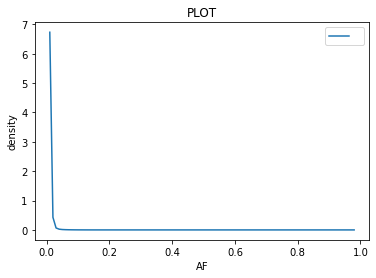

In [15]:
datum = na.NormalArtifactDatum(normal_alt_count=0, normal_depth=50, tumor_alt_count=10, tumor_depth=20, downsampling=1.0, variant_type="SNV")
na_model.plot_spectrum(datum, "PLOT")

In [41]:
snv_normal_af = []
snv_tumor_af = []
indel_normal_af = []
indel_tumor_af = []
for datum in na_train:
    if datum.variant_type() == "SNV":
        snv_normal_af.append(datum.normal_alt_count()/(datum.normal_depth()+0.01))
        snv_tumor_af.append(datum.tumor_alt_count()/(datum.tumor_depth()+0.01))
    else:
        indel_normal_af.append(datum.normal_alt_count()/(datum.normal_depth()+0.01))
        indel_tumor_af.append(datum.tumor_alt_count()/(datum.tumor_depth()+0.01))

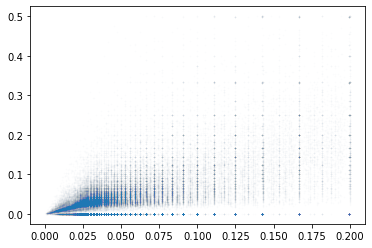

In [42]:
import matplotlib.pyplot as plt
plt.scatter(torch.tensor(snv_normal_af), torch.tensor(snv_tumor_af), s=0.5,alpha=0.01)

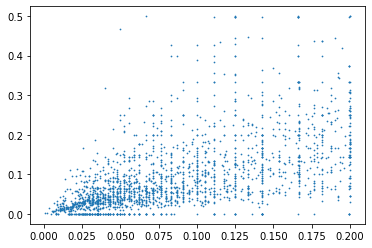

In [43]:
plt.scatter(torch.tensor(indel_normal_af), torch.tensor(indel_tumor_af), s=0.5,alpha=1.0)

ValueError: only one element tensors can be converted to Python scalars

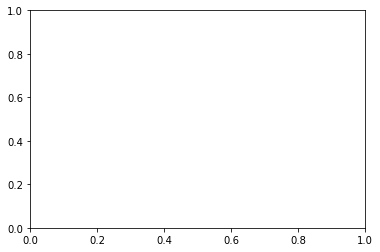

In [37]:
x=torch.tensor(normal_af)
y=torch.tensor(tumor_af)
plt.hist2d(x, y)